In [1]:
import numpy as np
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
import pandas as pd
from scipy import stats
from functools import reduce



### load data

In [2]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data_original = data.drop(columns=["replicate"])
ms_data = ms_data_original.copy()
ms_data = ms_data.apply(lambda row: row/row.mean(),axis=1)
ms_data = stats.zscore(np.log(ms_data))

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [3]:
# filter cas numbers with no intenisties over all samples
zeros = ms_data.columns[ms_data.eq(0).all()]
ms_data= ms_data.drop(zeros, axis=1)

In [4]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [5]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [6]:
panelist_data_comp_norm = stats.zscore(panelist_data_comp)

In [7]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol = CAS_to_mol[~CAS_to_mol['CAS'].isin(zeros)]

In [8]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [9]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

In [10]:
sweet_ms_df_FN = ms_data_comp[sweet_descriptors_CAS]

In [11]:
sig_Cass_Sweet_all_new = ['3033-23-6',
 '21284-22-0',
 '38427-78-0',
 '495-61-4',
 '29873-99-2',
 '876-17-5',
 '5989-27-5',
 '4674-50-4',
 '2243-33-6',
 '10307-61-6',
 '13419-69-7',
 '928-95-0',
 '928-97-2',
 '14371-10-9',
 '106-28-5',
 '5273-85-8',
 '5932-68-3',
 '07.11.5258',
 '13474-59-4',
 '23726-91-2',
 '3779-61-1',
 '4128-17-0',
 '1117-52-8',
 '92356-06-4',
 '928-96-1',
 '31501-11-8',
 '21662-09-9',
 '15456-69-6',
 '18679-18-0',
 '3790-78-1',
 '3338-55-4',
 '491-04-3',
 '28973-97-9',
 '4798-44-1',
 '562-74-3',
 '470-67-7',
 '83861-74-9',
 '359794-78-8',
 '470-82-6',
 '15051-81-7',
 '75853-49-5',
 '1072-83-9',
 '2497-25-8',
 '3913-71-1',
 '3913-81-3',
 '20407-84-5',
 '104-76-7',
 '928-94-9',
 '624-41-9',
 '123-96-6',
 '20664-46-4',
 '2548-87-0',
 '2363-89-5',
 '4861-58-9',
 '600-14-6',
 '04.02.4313',
 '05.03.4313',
 '30361-28-5',
 '13360-65-1',
 '136954-20-6',
 '7774-73-4',
 '31823-43-5',
 '1669-44-9',
 '51193-77-2',
 '34318-21-3',
 '586-82-3',
 '38284-27-4',
 '695-06-7',
 '19872-52-7',
 '818-49-5',
 '693-95-8',
 '34047-39-7',
 '2785-87-7',
 '2628-17-3',
 '13925-05-8',
 '620-02-0',
 '698-76-0',
 '67-47-0',
 '105683-99-6',
 '147159-48-6',
 '6627-88-9',
 '54290-12-9',
 '531-59-9',
 '698-10-2',
 '98-86-2',
 '498-02-2',
 '1192-62-7',
 '85213-22-5',
 '88-15-3',
 '25246-27-9',
 '489-39-4',
 '29887-38-5',
 '18607-93-7',
 '120-51-4',
 '103-37-7',
 '4430-42-6',
 '24703-35-3',
 '28588-75-2',
 '507-70-0',
 '26927-90-2',
 '13109-70-1',
 '7492-41-3',
 '76-50-6',
 '22451-73-6',
 '123-86-4',
 '136-60-7',
 '106-18-3',
 '24168-70-5',
 '114791-16-1',
 '29837-12-5',
 '483-77-2',
 '79-92-5',
 '465-31-6',
 '142-62-1',
 '97-42-7',
 '1139-30-6',
 '28231-03-0',
 '36653-82-4',
 '140-10-3',
 '15537-55-0',
 '106-23-0',
 '150-84-5',
 '141-16-2',
 '97-89-2',
 '7540-53-6',
 '122-03-2',
 '124-18-5',
 '69134-53-8',
 '105-57-7',
 '03.12.7554',
 '123-25-1',
 '87-91-2',
 '619-01-2',
 '20777-49-5',
 '58985-18-5',
 '484-31-1',
 '5756-24-1',
 '3658-80-8',
 '13925-07-0',
 '55764-23-3',
 '4077-47-8',
 '487-11-6',
 '639-99-6',
 '128386-31-2',
 '134346-43-3',
 '23267-57-4',
 '140-67-0',
 '157615-33-3',
 '181589-32-2',
 '111-35-3',
 '4192-77-2',
 '3025-30-7',
 '110516-60-4',
 '5405-41-4',
 '108-64-5',
 '105-54-4',
 '103-36-6',
 '2021-28-5',
 '628-97-7',
 '999-10-0',
 '97-62-1',
 '97-64-3',
 '7452-79-1',
 '101-97-3',
 '105-37-3',
 '118-61-6',
 '124-06-1',
 '539-82-2',
 '617-05-0',
 '15707-34-3',
 '123123-38-6',
 '97-53-0',
 '1632-73-1',
 '102322-83-8',
 '13679-70-4',
 '98-02-2',
 '19700-21-1',
 '106-24-1',
 '105-87-3',
 '3796-70-1',
 '106-29-6',
 '109-20-6',
 '10402-47-8',
 '15423-57-1',
 '23986-74-5',
 '90-05-1',
 '489-86-1',
 '629-78-7',
 '111-71-7',
 '142-82-5',
 '589-82-2',
 '111-70-6',
 '543-49-7',
 '110-43-0',
 '544-76-3',
 '29354-98-1',
 '18787-63-8',
 '66-25-1',
 '111-31-9',
 '111-27-3',
 '591-78-6',
 '589-38-8',
 '3681-71-8',
 '27538-10-9',
 '19888-33-6',
 '122-97-4',
 '95908-33-1',
 '21835-00-7',
 '3142-66-3',
 '5704-20-1',
 '123-92-2',
 '124-76-5',
 '1200-67-5',
 '2756-56-1',
 '110-19-0',
 '24683-00-9',
 '118-65-0',
 '18675-35-9',
 '97-54-1',
 '16750-94-0',
 '5944-20-7',
 '18433-98-2',
 '939-48-0',
 '638-11-9',
 '142-91-6',
 '89-49-6',
 '503-74-2',
 '498-16-8',
 '23089-26-1',
 '138-86-3',
 '78-70-6',
 '115-95-7',
 '78-36-4',
 '115-99-1',
 '1118-27-0',
 '10471-96-2',
 '89-80-5',
 '10458-14-7',
 '40789-98-8',
 '34300-94-2',
 '50746-10-6',
 '75832-79-0',
 '67633-97-0',
 '17042-24-9',
 '3268-49-3',
 '16630-66-3',
 '95-63-6',
 '2527-76-6',
 '93-58-3',
 '623-42-7',
 '1754-62-7',
 '103-26-4',
 '4630-82-4',
 '39647-11-5',
 '93-15-2',
 '27538-09-6',
 '1189-09-9',
 '106-70-7',
 '1211-29-6',
 '556-24-1',
 '868-57-5',
 '547-63-7',
 '112-61-8',
 '124-10-7',
 '3943-74-6',
 '5287-45-6',
 '116-53-0',
 '65128-99-6',
 '26486-13-5',
 '13679-85-1',
 '5616-51-3',
 '28588-74-1',
 '59303-05-8',
 '110-93-0',
 '590-36-3',
 '565-69-5',
 '26548-78-7',
 '123-35-3',
 '607-91-0',
 '91-20-3',
 '106-25-2',
 '40716-66-3',
 '141-12-8',
 '629-92-5',
 '124-19-6',
 '111-84-2',
 '821-55-6',
 '19322-27-1',
 '27400-71-1',
 '502-99-8',
 '638-66-4',
 '593-45-3',
 '65767-22-8',
 '124-13-0',
 '111-65-9',
 '111-87-5',
 '589-98-0',
 '111-13-7',
 '106-68-3',
 '18409-17-1',
 '3391-86-4',
 '4312-99-6',
 '29790-29-2',
 '619-62-5',
 '123-11-5',
 '501-98-4',
 '18479-68-0',
 '28839-13-6',
 '629-80-1',
 '599-04-2',
 '09.11.2765',
 '629-62-9',
 '109-52-4',
 '502-69-2',
 '103-82-2',
 '122-78-1',
 '97-47-3',
 '16721-39-4',
 '105-66-8',
 '106-36-5',
 '5471-51-2',
 '3387-41-5',
 '94-59-7',
 '73744-93-1',
 '83-34-1',
 '28664-35-9',
 '6750-60-3',
 '112-92-5',
 '100-42-5',
 '91-10-1',
 '19912-62-0',
 '80-26-2',
 '629-59-4',
 '124-25-4',
 '6258-63-5',
 '17699-16-0',
 '638-67-5',
 '10486-19-8',
 '81018-77-1',
 '57461-21-9',
 '1209-71-8',
 '03.07.4630',
 '552-02-3',
 '182699-77-0',
 '58334-55-7',
 '515-69-5',
 '481-34-5',
 '4586-22-5',
 '3856-25-5',
 '17699-14-8',
 '644-30-4',
 '502-61-4',
 '14575-74-7',
 '01.12.3691',
 '489-40-7',
 '6753-98-6',
 '127-41-3',
 '10208-80-7',
 '1195-32-0',
 '99-83-2',
 '80-56-8',
 '99-86-5',
 '98-55-5',
 '02.05.2867',
 '495-60-3',
 '15352-77-9',
 '554-60-9',
 '87-44-5',
 '472-97-9',
 '13744-15-5',
 '23726-93-4',
 '33880-83-0',
 '473-15-4',
 '18794-84-8',
 '58181-76-3',
 '88-84-6',
 '79-77-6',
 '555-10-2',
 '103-45-7',
 '127-91-3',
 '17066-67-0',
 '20307-83-9',
 '60066-88-8',
 '138-87-4',
 '39029-41-9',
 '07.05.2305',
 '105-21-5',
 '30021-74-0',
 '104-50-7',
 '515-17-3',
 '99-85-4',
 '13466-78-9',
 '483-76-1',
 '36564-42-8',
 '713-95-1',
 '20307-84-0',
 '120021-96-7',
 '586-62-9']

In [24]:
sig_CAS_Sweet_0005_all = ['21284-22-0',
 '106-28-5',
 '23726-91-2',
 '4128-17-0',
 '1117-52-8',
 '15456-69-6',
 '18679-18-0',
 '3790-78-1',
 '15051-81-7',
 '6627-88-9',
 '18607-93-7',
 '13109-70-1',
 '22451-73-6',
 '97-42-7',
 '123-25-1',
 '87-91-2',
 '20777-49-5',
 '58985-18-5',
 '484-31-1',
 '639-99-6',
 '3025-30-7',
 '617-05-0',
 '123123-38-6',
 '105-87-3',
 '3796-70-1',
 '489-86-1',
 '2756-56-1',
 '89-49-6',
 '23089-26-1',
 '115-95-7',
 '607-91-0',
 '40716-66-3',
 '141-12-8',
 '29790-29-2',
 '28839-13-6',
 '112-92-5',
 '19912-62-0',
 '80-26-2',
 '1209-71-8',
 '552-02-3',
 '58334-55-7',
 '515-69-5',
 '481-34-5',
 '4586-22-5',
 '127-41-3',
 '15352-77-9',
 '472-97-9',
 '473-15-4',
 '58181-76-3',
 '79-77-6',
 '36564-42-8']

In [25]:
sweet_ms_df_all = ms_data_comp[sig_Cass_Sweet_all_new]
sweet_ms_df_0005 = ms_data_comp[sig_CAS_Sweet_0005_all ]

In [56]:
# possible methods to compare
defuzz_methods =['centroid','bisector','lom','mom','som']

In [70]:
print(len(sweet_ms_df_FN.columns))
print(len(sweet_ms_df_0005.columns))

61
51


(array([24.,  3.,  1.,  0.,  6.,  1.,  2.,  0.,  2., 12.]),
 array([-0.02868208, -0.02023896, -0.01179584, -0.00335273,  0.00509039,
         0.01353351,  0.02197663,  0.03041975,  0.03886287,  0.04730598,
         0.0557491 ]),
 <BarContainer object of 10 artists>)

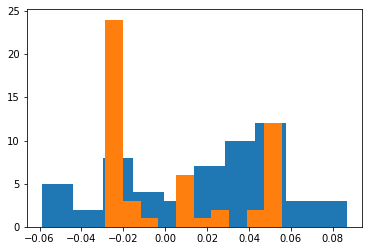

In [67]:
plt.hist(sweet_ms_df_FN.mean())
plt.hist(sweet_ms_df_0005.mean())

(array([ 6.,  0.,  1.,  1.,  1.,  0.,  3., 26.,  0., 13.]),
 array([-2.64096316, -2.55500196, -2.46904077, -2.38307957, -2.29711837,
        -2.21115717, -2.12519597, -2.03923477, -1.95327358, -1.86731238,
        -1.78135118]),
 <BarContainer object of 10 artists>)

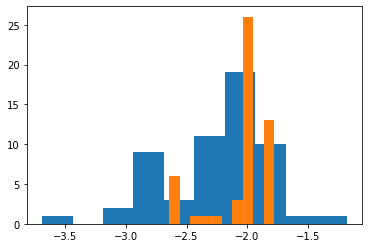

In [80]:
plt.hist(sweet_ms_df_FN.min())
plt.hist(sweet_ms_df_0005.min())

(array([ 1.,  2.,  1.,  0.,  0., 14.,  8.,  2.,  0., 23.]),
 array([2.14292396, 2.22242772, 2.30193149, 2.38143525, 2.46093902,
        2.54044278, 2.61994655, 2.69945031, 2.77895408, 2.85845784,
        2.93796161]),
 <BarContainer object of 10 artists>)

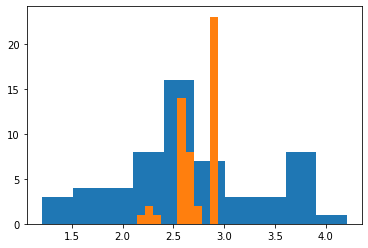

In [74]:
plt.hist(sweet_ms_df_FN.max())
plt.hist(sweet_ms_df_0005.max())

## prediction

In [57]:
def predict_all(fuzzy,df, CAS_desc):
    predictions = []
    for index, row in df.iterrows():
        for cas in CAS_desc:
            fuzzy.input[ cas ] = row[cas]
        
        fuzzy.compute()  
        predictions.append(fuzzy.output['osa_sweet'])
        
    references = np.array(panelist_data_comp_norm['Sweet'])
    
    plt.hist(references, alpha = 0.5)
    plt.hist(predictions, alpha = 0.5) 
    labels= ["references", "prediction"]
    plt.legend(labels)
    plt.title("'Sweet': predictions vs. panelist data over all comparable samples using Flavornet moleucles"+"\n Correlation: "+
            str(np.corrcoef(np.array(predictions), references)[0,1]))

## 3 params

In [15]:
def fuzzy_3(CAS_descriptor, method):
    zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 

    cas_antecedents = [] 
    # we only use the sweet descriptors 
    for cas in CAS_descriptor:
        cas_name = str(cas)  
        cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
        cas_antecedent.automf(3)
        
        
        cas_antecedents.append( cas_antecedent) 


    osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet',defuzzify_method=method)
    osa_sweet.automf(3)

    
    rule_list = []
    for cas_sweet in cas_antecedents:
        rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
        rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
        rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

        # Set up the system 
    fuzzy_ctrl = ctrl.ControlSystem(rule_list)
    fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)
    return(fuzzy)

split each antecedent and conesequent into 3 areas


zscore from -3 to 3 and 25 values 

#### FN molecules

##### method 1 : centroid

In [84]:
fuzzy_centroid = fuzzy_3(sweet_descriptors_CAS,defuzz_methods[0])

In [50]:
for index,entry in sweet_ms_df_FN.loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp_norm.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  1.0112259776422
prediction score for sweet:  50.07882901153635


In [51]:
for index,entry in sweet_ms_df_FN.loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp_norm.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  -0.877034852647026
prediction score for sweet:  51.332224666159746


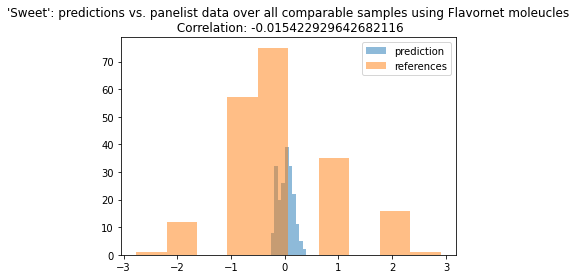

In [85]:
predict_all(fuzzy_centroid, sweet_ms_df_FN,sweet_descriptors_CAS)

##### method 2: bisector

In [82]:
fuzzy_bisector = fuzzy_3(sweet_descriptors_CAS,defuzz_methods[1])

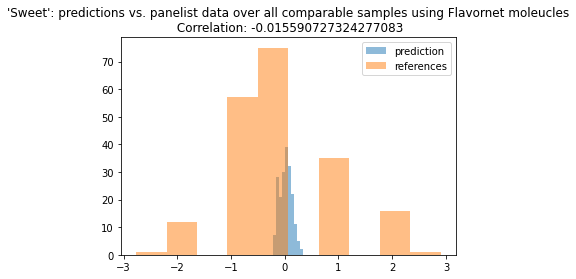

In [83]:
predict_all(fuzzy_bisector, sweet_ms_df_FN,sweet_descriptors_CAS)

##### method 3: lom

In [79]:
fuzzy_lom = fuzzy_3(sweet_descriptors_CAS,defuzz_methods[2])

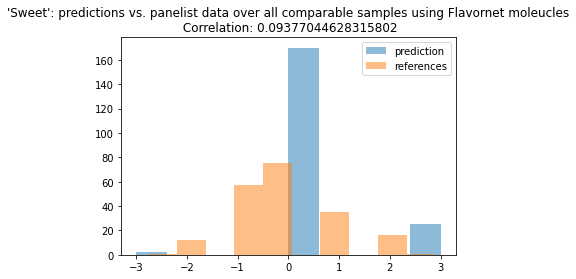

In [80]:
predict_all(fuzzy_lom, sweet_ms_df_FN,sweet_descriptors_CAS)

##### method 4: mom

In [77]:
fuzzy_mom = fuzzy_3(sweet_descriptors_CAS,defuzz_methods[3])

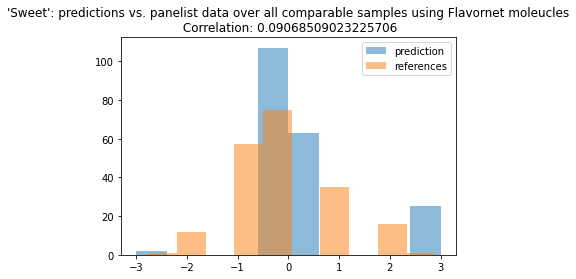

In [78]:
predict_all(fuzzy_mom, sweet_ms_df_FN,sweet_descriptors_CAS)

##### mehtod 5: som

In [75]:
fuzzy_som = fuzzy_3(sweet_descriptors_CAS,defuzz_methods[4])

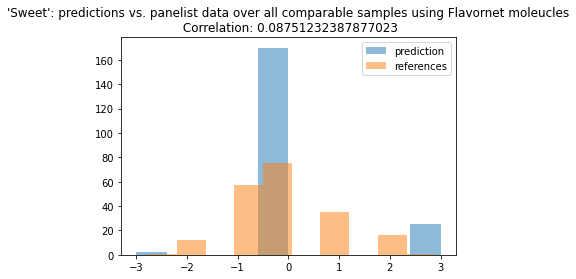

In [76]:
predict_all(fuzzy_som, sweet_ms_df_FN,sweet_descriptors_CAS)

#### new found CAS

In [17]:
fuzzy_lom_new = fuzzy_3(sig_Cass_Sweet_all_new,defuzz_methods[2])

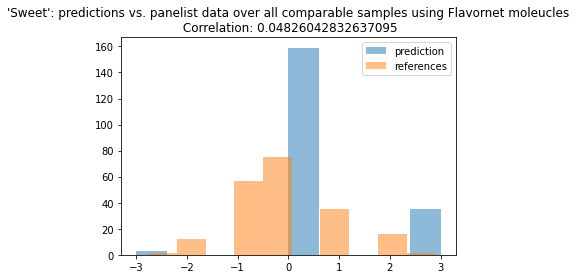

In [18]:
predict_all(fuzzy_lom_new, sweet_ms_df_all,sig_Cass_Sweet_all_new)

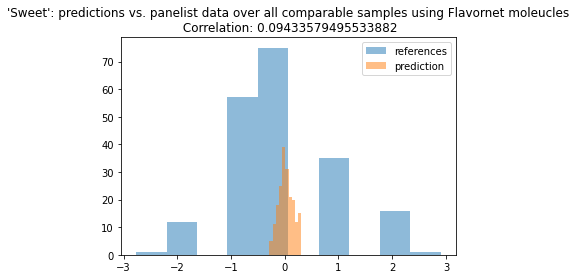

In [81]:
# method 2
sweet_bisector_new = fuzzy_3(sig_Cass_Sweet_all_new,defuzz_methods[1])
predict_all(sweet_bisector_new, sweet_ms_df_all,sig_Cass_Sweet_all_new)

#### subset new found CAS

##### method 1 centroid : 

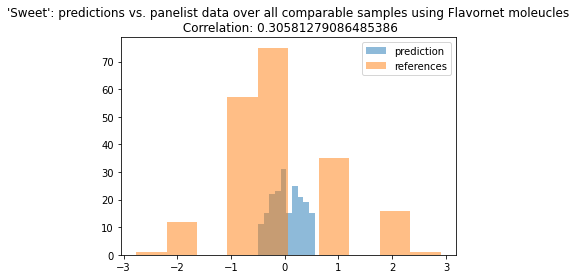

In [ ]:
# subset alpha = 0.0005
fuzzy_centroid_0005 = fuzzy_3(sig_CAS_Sweet_0005_all,defuzz_methods[0])
predict_all(fuzzy_centroid_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 2 bisector : 

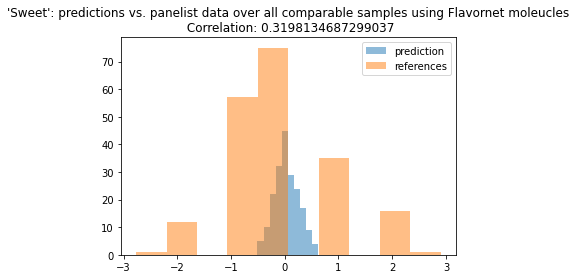

In [28]:
# subset alpha = 0.0005
fuzzy_bisector_0005 = fuzzy_3(sig_CAS_Sweet_0005_all,defuzz_methods[1])
predict_all(fuzzy_bisector_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 3 lom: 

In [26]:
# subset alpha = 0.0005
fuzzy_lom_0005 = fuzzy_3(sig_CAS_Sweet_0005_all,defuzz_methods[2])

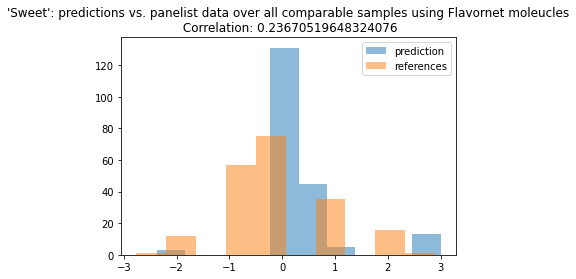

In [27]:
predict_all(fuzzy_lom_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 4 som :


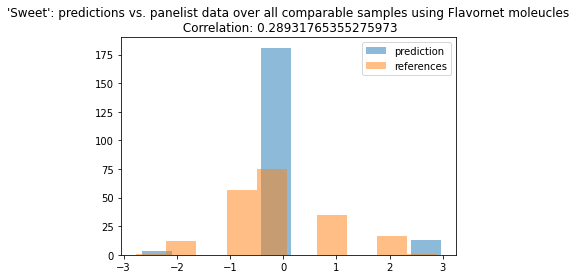

In [31]:
# subset alpha = 0.0005
fuzzy_som_0005 = fuzzy_3(sig_CAS_Sweet_0005_all,defuzz_methods[3])
predict_all(fuzzy_som_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 5 mom : 

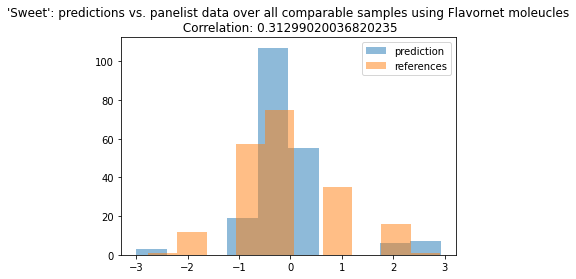

In [32]:
# subset alpha = 0.0005
fuzzy_mom_0005 = fuzzy_3(sig_CAS_Sweet_0005_all,defuzz_methods[4])
predict_all(fuzzy_mom_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

## 7 params
=> little to no improvment

In [34]:
def fuzzy_7(CAS_descriptor, method):
    zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 

    cas_antecedents = [] 
    # we only use the sweet descriptors 
    for cas in CAS_descriptor:
        cas_name = str(cas)  
        cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
        cas_antecedent.automf(7)
        
        
        cas_antecedents.append( cas_antecedent) 


    osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet',defuzzify_method=method)
    osa_sweet.automf(7)

    
    rule_list = []
    for cas_sweet in cas_antecedents:
        rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
        rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
        rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

        # Set up the system 
    fuzzy_ctrl = ctrl.ControlSystem(rule_list)
    fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)
    return(fuzzy)

#### subset new found CAS

##### method 1 centroid : 

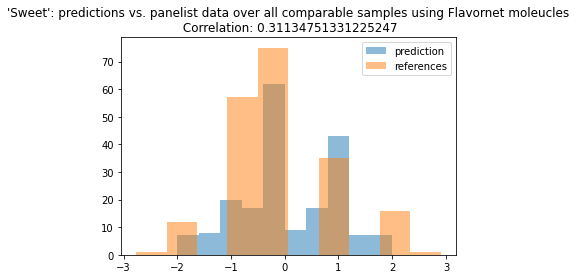

In [39]:
# subset alpha = 0.0005
fuzzy_7_centroid_0005 = fuzzy_7(sig_CAS_Sweet_0005_all,defuzz_methods[0])
predict_all(fuzzy_7_centroid_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 2 bisector : 

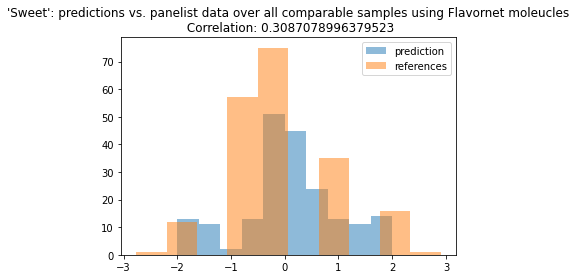

In [40]:
# subset alpha = 0.0005
fuzzy_7_bisector_0005 = fuzzy_7(sig_CAS_Sweet_0005_all,defuzz_methods[1])
predict_all(fuzzy_7_bisector_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 3 lom: 

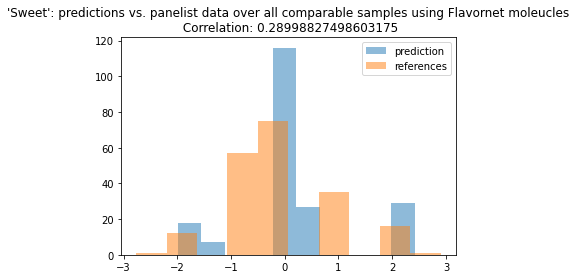

In [41]:
# subset alpha = 0.0005
fuzzy_7_lom_0005 = fuzzy_7(sig_CAS_Sweet_0005_all,defuzz_methods[2])
predict_all(fuzzy_7_lom_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 4 som :


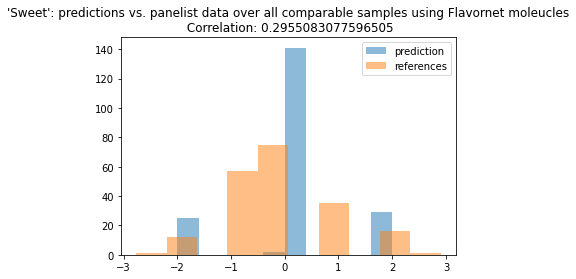

In [42]:
# subset alpha = 0.0005
fuzzy_7_som_0005 = fuzzy_7(sig_CAS_Sweet_0005_all,defuzz_methods[3])
predict_all(fuzzy_7_som_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

##### method 5 mom : 

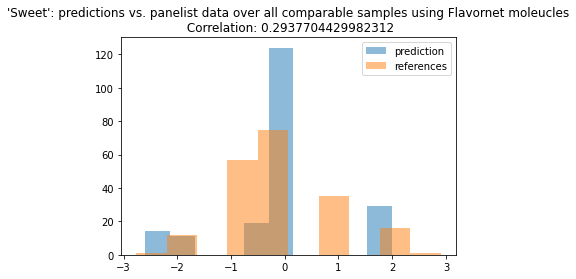

In [43]:
# subset alpha = 0.0005
fuzzy_7_mom_0005 = fuzzy_7(sig_CAS_Sweet_0005_all,defuzz_methods[4])
predict_all(fuzzy_7_mom_0005, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

#### FN molecules

##### method 1 : centroid

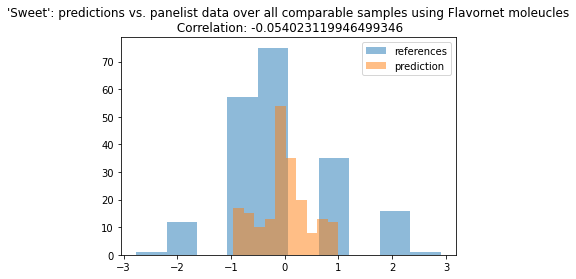

In [59]:
fuzzy_centroid_7 = fuzzy_7(sweet_descriptors_CAS,defuzz_methods[0])
predict_all(fuzzy_centroid_7, sweet_ms_df_FN,sweet_descriptors_CAS)

##### method 2: bisector

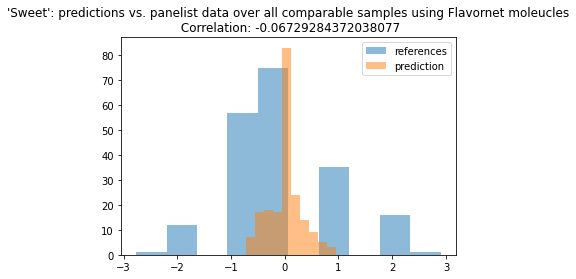

In [60]:
fuzzy_bisector_7 = fuzzy_7(sweet_descriptors_CAS,defuzz_methods[1])
predict_all(fuzzy_bisector_7, sweet_ms_df_FN,sweet_descriptors_CAS)

##### method 3: lom

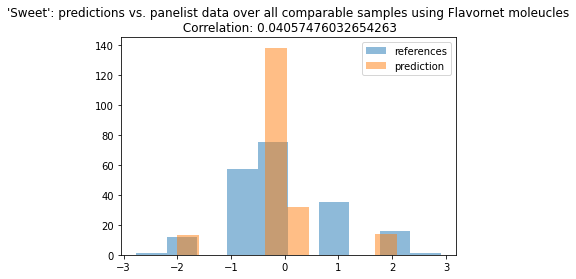

In [61]:
fuzzy_lom_7 = fuzzy_7(sweet_descriptors_CAS,defuzz_methods[2])
predict_all(fuzzy_lom_7, sweet_ms_df_FN,sweet_descriptors_CAS)

##### method 4: mom

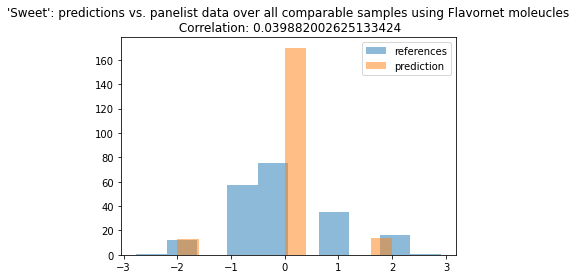

In [62]:
fuzzy_mom_7 = fuzzy_7(sweet_descriptors_CAS,defuzz_methods[3])
predict_all(fuzzy_mom_7, sweet_ms_df_FN,sweet_descriptors_CAS)

##### mehtod 5: som

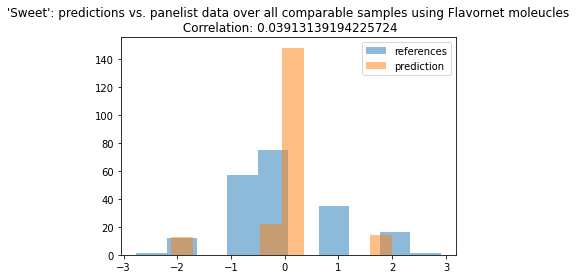

In [63]:
fuzzy_som_7 = fuzzy_7(sweet_descriptors_CAS,defuzz_methods[4])
predict_all(fuzzy_som_7, sweet_ms_df_FN,sweet_descriptors_CAS)


## zscorerange(-1.5,1.5)

In [44]:
def fuzzy_1_5(CAS_descriptor, method):
    zscore_range=np.linspace(-1.5,1.5,25) # Since we only use zscored data, this range can be used everywhere 

    cas_antecedents = [] 
    # we only use the sweet descriptors 
    for cas in CAS_descriptor:
        cas_name = str(cas)  
        cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
        cas_antecedent.automf(3)
        
        
        cas_antecedents.append( cas_antecedent) 


    osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet',defuzzify_method=method)
    osa_sweet.automf(3)

    
    rule_list = []
    for cas_sweet in cas_antecedents:
        rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
        rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
        rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

        # Set up the system 
    fuzzy_ctrl = ctrl.ControlSystem(rule_list)
    fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)
    return(fuzzy)

#### FN


##### method 3 : lom 
-> was best with zscore -3 and 3 see how it changes when using a smaller range

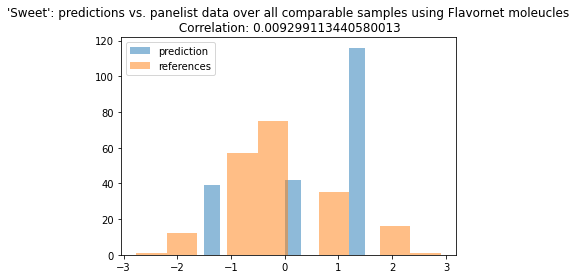

In [47]:
fuzzy_1_5_lom = fuzzy_1_5(sweet_descriptors_CAS,defuzz_methods[2])
predict_all(fuzzy_1_5_lom, sweet_ms_df_FN,sweet_descriptors_CAS)

### subset new found

method 1 : centroid

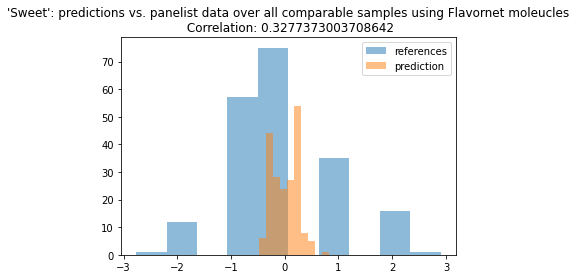

In [64]:
# subset alpha = 0.0005
fuzzy_centroid_0005_1_5 = fuzzy_1_5(sig_CAS_Sweet_0005_all,defuzz_methods[0])
predict_all(fuzzy_centroid_0005_1_5, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

method 2 : bisector

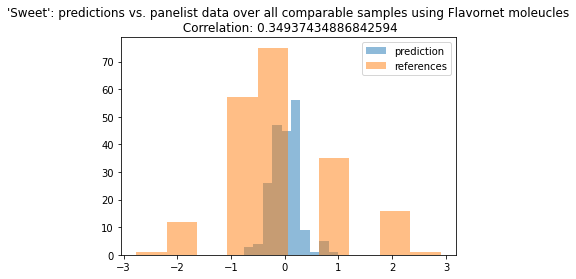

In [48]:
# subset alpha = 0.0005
fuzzy_bisector_0005_1_5 = fuzzy_1_5(sig_CAS_Sweet_0005_all,defuzz_methods[1])
predict_all(fuzzy_bisector_0005_1_5, sweet_ms_df_0005,sig_CAS_Sweet_0005_all)

### all new found

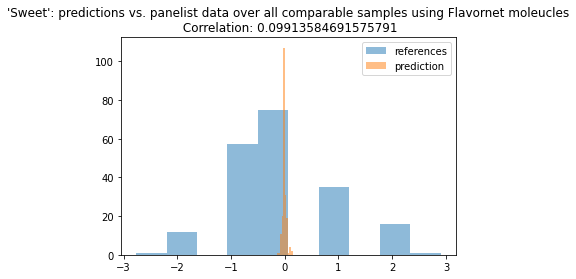

In [82]:
# all new cas
sweet_bisector_1_5 = fuzzy_1_5(sig_Cass_Sweet_all_new,defuzz_methods[1])
predict_all(sweet_bisector_1_5, sweet_ms_df_all,sig_Cass_Sweet_all_new)

## OLD 

### Sweet cw

In [ ]:
sweet_ms_df = ms_data_comp[sweet_descriptors_CAS]

In [ ]:
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    cas_antecedents.append( cas_antecedent) 

osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet.automf(3)


rules: 

if one sweet cas is good than contributes to osa good

analog with average an poor

In [ ]:
'''rule_sweet = ctrl.Rule(create_rules('good'), osa_sweet['good'])
rule_average = ctrl.Rule(create_rules('average'), osa_sweet['average'])
rule_low = ctrl.Rule(create_rules('poor'), osa_sweet['poor'])

rules = ctrl.ControlSystem([
    rule_sweet,
    rule_average,
    rule_low
])
fuzzy_ctrl = ctrl.ControlSystemSimulation(rules)
'''

"rule_sweet = ctrl.Rule(create_rules('good'), osa_sweet['good'])\nrule_average = ctrl.Rule(create_rules('average'), osa_sweet['average'])\nrule_low = ctrl.Rule(create_rules('poor'), osa_sweet['poor'])\n\nrules = ctrl.ControlSystem([\n    rule_sweet,\n    rule_average,\n    rule_low\n])\nfuzzy_ctrl = ctrl.ControlSystemSimulation(rules)\n"

In [ ]:
# define some rules 
one_good =  reduce(lambda x, y: x | y, [ caa['good'] for caa in cas_antecedents])
one_avg =  reduce(lambda x, y: x | y, [ caa['average'] for caa in cas_antecedents])

all_poor =  reduce(lambda x, y: x & y, [ caa['poor'] for caa in cas_antecedents])
all_avg =  reduce(lambda x, y: x & y, [ caa['average'] for caa in cas_antecedents])

rules = [    
    ctrl.Rule( all_poor, osa_sweet['poor']   ),
    ctrl.Rule( all_avg, osa_sweet['average'] ),
    ctrl.Rule( one_good, osa_sweet['good']   ),
]

In [ ]:
# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rules)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [ ]:
ms_data = stats.zscore(ms_data_comp,axis=0)
predictions = []
for index, row in ms_data.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
       

In [ ]:
sweet_ms_df_zscore = stats.zscore(sweet_ms_df, axis = 0)

In [ ]:
for index,entry in sweet_ms_df_zscore.loc['000656'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = stats.zscore(panelist_data_comp).loc['000565']['Sweet']
       

panelist score for sweet:  0.06709556249758704
prediction score for sweet:  0.3761097134566199


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


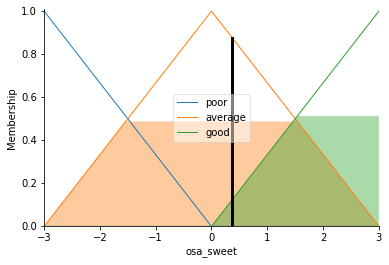

In [ ]:
print("panelist score for sweet: " , references)
print("prediction score for sweet: ",predictions)

osa_sweet.view(sim=fuzzy)

In [ ]:
# over all samples
predictions = []
for index, row in sweet_ms_df_zscore.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
       

(array([ 2.,  0.,  0.,  0., 64., 68., 19.,  5.,  5., 34.]),
 array([-1.68423428, -1.31581085, -0.94738742, -0.57896399, -0.21054057,
         0.15788286,  0.52630629,  0.89472972,  1.26315314,  1.63157657,
         2.        ]),
 <BarContainer object of 10 artists>)

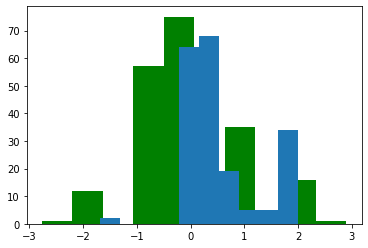

In [ ]:
plt.hist(stats.zscore(references), color='g')
plt.hist(predictions)

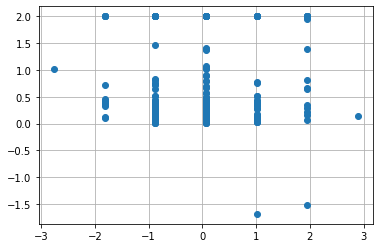

In [ ]:
plt.plot(stats.zscore(references),predictions,"o")
plt.grid()

always between 40 and 60 

change zscore range to -0.5 and 0.5

In [50]:
zscore_range=np.linspace(-0.5,0.5,197)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [60]:
for index,entry in sweet_ms_df.loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)


panelist score for sweet:  50
prediction score for sweet:  49.50000000000003


In [52]:
for index,entry in sweet_ms_df.loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  30
prediction score for sweet:  47.00462071566259


sample: 000838
prediction: 49.50000000000003


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


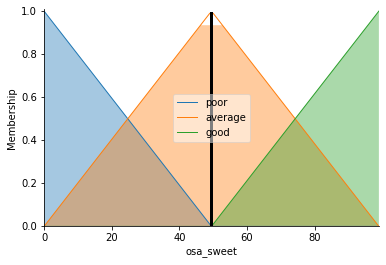

In [61]:
print("sample: 000838\nprediction: " + str(predictions))
osa_sweet.view(sim=fuzzy)

In [39]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

KeyboardInterrupt: 

Text(0.5, 1.0, 'Correlation: 0.01650035630269362')

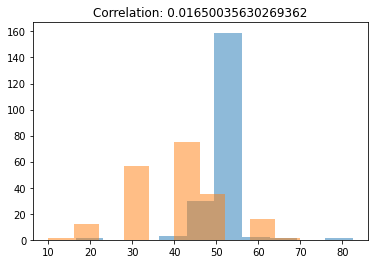

In [ ]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

np.arange(0, 100, 10)

In [ ]:
zscore_range=np.linspace(-0.5,0.5,197)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [ ]:
for index,entry in sweet_ms_df.loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

for index,entry in sweet_ms_df.loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  50
prediction score for sweet:  45.00000000000001
panelist score for sweet:  30
prediction score for sweet:  42.75554707401083


In [ ]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, 'Correlation: 0.015346840297953596')

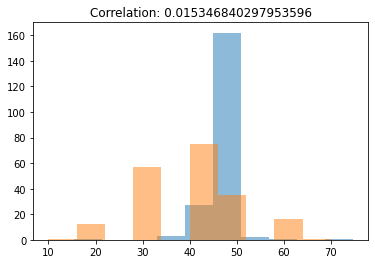

In [ ]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

#### only significant sweet cas numbers

In [ ]:
sig_sweet_CAS = ['101-97-3',
 '10486-19-8',
 '106-25-2',
 '106-70-7',
 '1118-27-0',
 '112-44-7',
 '1139-30-6',
 '115-95-7',
 '1209-71-8',
 '122-78-1',
 '123-11-5',
 '123123-38-6',
 '141-16-2',
 '15051-81-7',
 '15352-77-9',
 '18679-18-0',
 '18794-84-8',
 '20407-84-5',
 '07.05.2305',
 '23267-57-4',
 '2463-77-6',
 '27538-09-6',
 '3033-23-6',
 '3779-61-1',
 '4077-47-8',
 '470-82-6',
 '4748-78-1',
 '4861-58-9',
 '502-61-4',
 '531-59-9',
 '552-02-3',
 '60066-88-8',
 '617-05-0',
 '623-42-7',
 '637-69-4',
 '6627-88-9',
 '695-06-7',
 '713-95-1',
 '73744-93-1',
 '03.12.7554',
 '90-05-1',
 '93-58-3',
 '939-48-0',
 '94-59-7',
 '95-93-2']

In [ ]:
zscore_range=np.linspace(-0.5,0.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [ ]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sig_sweet_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, 'Correlation: 0.04952059494612476')

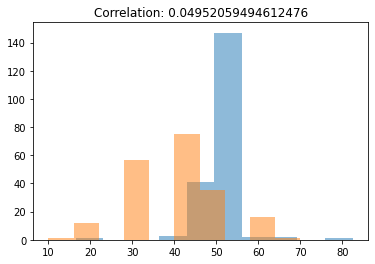

In [ ]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

=> slightly better correlation

#### all new significant sweet cas numbers 

In [ ]:
sig_sweet_CAS_all = ['3033-23-6',
 '876-17-5',
 '07.11.5258',
 '4128-17-0',
 '1117-52-8',
 '31501-11-8',
 '21662-09-9',
 '15456-69-6',
 '18679-18-0',
 '491-04-3',
 '562-74-3',
 '470-67-7',
 '470-82-6',
 '2497-25-8',
 '3913-71-1',
 '3913-81-3',
 '4861-58-9',
 '136954-20-6',
 '586-82-3',
 '105683-99-6',
 '147159-48-6',
 '6627-88-9',
 '531-59-9',
 '85213-22-5',
 '29887-38-5',
 '507-70-0',
 '13109-70-1',
 '465-31-6',
 '97-42-7',
 '15537-55-0',
 '106-23-0',
 '150-84-5',
 '87-91-2',
 '619-01-2',
 '20777-49-5',
 '58985-18-5',
 '128386-31-2',
 '4192-77-2',
 '3025-30-7',
 '103-36-6',
 '617-05-0',
 '1632-73-1',
 '106-24-1',
 '105-87-3',
 '3796-70-1',
 '124-76-5',
 '2756-56-1',
 '18675-35-9',
 '16750-94-0',
 '5944-20-7',
 '89-49-6',
 '498-16-8',
 '78-70-6',
 '115-95-7',
 '89-80-5',
 '10458-14-7',
 '106-25-2',
 '141-12-8',
 '29790-29-2',
 '619-62-5',
 '18479-68-0',
 '28839-13-6',
 '16721-39-4',
 '91-10-1',
 '80-26-2',
 '629-59-4',
 '17699-16-0',
 '10486-19-8',
 '14575-74-7',
 '98-55-5',
 '138-87-4',
 '07.05.2305',
 '713-95-1']

In [ ]:
sig_sweet_CAS_all = [i for i in sig_sweet_CAS_all if i not in zeros]

In [ ]:
# alpha = 0.001
len(sig_sweet_CAS_all)

73

In [ ]:
sig_sweet_CAS_005 = ['3033-23-6',
 '21284-22-0',
 '38427-78-0',
 '495-61-4',
 '29873-99-2',
 '876-17-5',
 '4674-50-4',
 '14371-10-9',
 '106-28-5',
 '5273-85-8',
 '5932-68-3',
 '07.11.5258',
 '13474-59-4',
 '23726-91-2',
 '4128-17-0',
 '1117-52-8',
 '31501-11-8',
 '21662-09-9',
 '15456-69-6',
 '18679-18-0',
 '3790-78-1',
 '491-04-3',
 '28973-97-9',
 '562-74-3',
 '470-67-7',
 '359794-78-8',
 '470-82-6',
 '15051-81-7',
 '2497-25-8',
 '3913-71-1',
 '3913-81-3',
 '20407-84-5',
 '4861-58-9',
 '30361-28-5',
 '136954-20-6',
 '31823-43-5',
 '34318-21-3',
 '586-82-3',
 '38284-27-4',
 '19872-52-7',
 '698-76-0',
 '105683-99-6',
 '147159-48-6',
 '6627-88-9',
 '531-59-9',
 '698-10-2',
 '85213-22-5',
 '25246-27-9',
 '489-39-4',
 '29887-38-5',
 '18607-93-7',
 '103-37-7',
 '24703-35-3',
 '28588-75-2',
 '507-70-0',
 '26927-90-2',
 '13109-70-1',
 '7492-41-3',
 '22451-73-6',
 '136-60-7',
 '106-18-3',
 '114791-16-1',
 '29837-12-5',
 '465-31-6',
 '97-42-7',
 '1139-30-6',
 '28231-03-0',
 '36653-82-4',
 '15537-55-0',
 '106-23-0',
 '150-84-5',
 '141-16-2',
 '97-89-2',
 '124-18-5',
 '69134-53-8',
 '03.12.7554',
 '123-25-1',
 '87-91-2',
 '619-01-2',
 '20777-49-5',
 '58985-18-5',
 '484-31-1',
 '4077-47-8',
 '487-11-6',
 '639-99-6',
 '128386-31-2',
 '134346-43-3',
 '23267-57-4',
 '157615-33-3',
 '4192-77-2',
 '3025-30-7',
 '110516-60-4',
 '5405-41-4',
 '103-36-6',
 '2021-28-5',
 '999-10-0',
 '101-97-3',
 '124-06-1',
 '617-05-0',
 '123123-38-6',
 '97-53-0',
 '1632-73-1',
 '19700-21-1',
 '106-24-1',
 '105-87-3',
 '3796-70-1',
 '15423-57-1',
 '23986-74-5',
 '90-05-1',
 '489-86-1',
 '544-76-3',
 '29354-98-1',
 '3681-71-8',
 '27538-10-9',
 '19888-33-6',
 '95908-33-1',
 '124-76-5',
 '1200-67-5',
 '2756-56-1',
 '118-65-0',
 '18675-35-9',
 '97-54-1',
 '16750-94-0',
 '5944-20-7',
 '18433-98-2',
 '939-48-0',
 '89-49-6',
 '498-16-8',
 '23089-26-1',
 '78-70-6',
 '115-95-7',
 '115-99-1',
 '89-80-5',
 '10458-14-7',
 '75832-79-0',
 '4630-82-4',
 '93-15-2',
 '27538-09-6',
 '1189-09-9',
 '124-10-7',
 '3943-74-6',
 '65128-99-6',
 '607-91-0',
 '106-25-2',
 '40716-66-3',
 '141-12-8',
 '629-92-5',
 '124-19-6',
 '821-55-6',
 '638-66-4',
 '593-45-3',
 '65767-22-8',
 '29790-29-2',
 '619-62-5',
 '501-98-4',
 '18479-68-0',
 '28839-13-6',
 '09.11.2765',
 '502-69-2',
 '97-47-3',
 '16721-39-4',
 '5471-51-2',
 '73744-93-1',
 '6750-60-3',
 '112-92-5',
 '91-10-1',
 '19912-62-0',
 '80-26-2',
 '629-59-4',
 '17699-16-0',
 '10486-19-8',
 '81018-77-1',
 '57461-21-9',
 '1209-71-8',
 '03.07.4630',
 '552-02-3',
 '58334-55-7',
 '515-69-5',
 '481-34-5',
 '4586-22-5',
 '3856-25-5',
 '17699-14-8',
 '502-61-4',
 '14575-74-7',
 '01.12.3691',
 '489-40-7',
 '6753-98-6',
 '127-41-3',
 '10208-80-7',
 '1195-32-0',
 '98-55-5',
 '495-60-3',
 '15352-77-9',
 '87-44-5',
 '472-97-9',
 '13744-15-5',
 '23726-93-4',
 '33880-83-0',
 '473-15-4',
 '18794-84-8',
 '58181-76-3',
 '88-84-6',
 '79-77-6',
 '103-45-7',
 '17066-67-0',
 '20307-83-9',
 '60066-88-8',
 '138-87-4',
 '39029-41-9',
 '07.05.2305',
 '30021-74-0',
 '104-50-7',
 '515-17-3',
 '483-76-1',
 '36564-42-8',
 '713-95-1',
 '20307-84-0',
 '120021-96-7']

In [ ]:
#alpha = 0.005
sig_sweet_CAS_005 = [i for i in sig_sweet_CAS_005 if i not in zeros]

In [ ]:
zscore_range=np.linspace(-0.5,0.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS_all:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [ ]:
predictions = []
for index, row in ms_data_comp[sig_sweet_CAS_all].iterrows():
    for cas in sig_sweet_CAS_all:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])

Text(0.5, 1.0, 'Correlation: 0.06692980082028953')

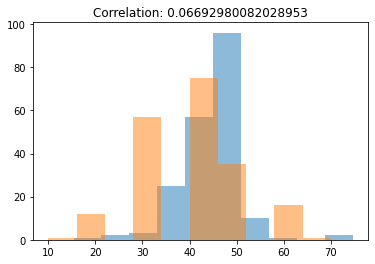

In [ ]:
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

In [ ]:
zscore_range=np.linspace(-0.5,0.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS_005:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(3)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [ ]:
for index,entry in ms_data_comp[sig_sweet_CAS_005].loc['000838'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000838']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

for index,entry in ms_data_comp[sig_sweet_CAS_005].loc['000929'].items():
    fuzzy.input[ index ] = entry
    
fuzzy.compute()  
predictions  = fuzzy.output['osa_sweet']

references = panelist_data_comp.loc['000929']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", predictions)

panelist score for sweet:  50
prediction score for sweet:  60.000000000000014
panelist score for sweet:  30
prediction score for sweet:  31.48627671650041


Text(0.5, 1.0, 'Correlation: 0.10494346220357609')

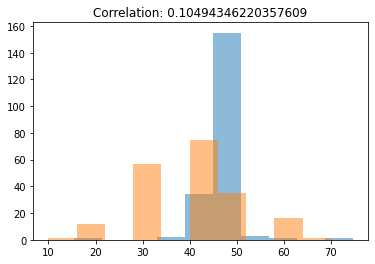

In [ ]:
predictions = []
for index, row in ms_data_comp[sig_sweet_CAS_005].iterrows():
    for cas in sig_sweet_CAS_005:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

In [ ]:
#7 
zscore_range=np.linspace(-1.5,1.5,20)# Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sig_sweet_CAS_005:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(7)
    
    
    cas_antecedents.append( cas_antecedent) 
    
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(7)
rule_list = []
for cas_sweet in cas_antecedents:
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))

# Set up the system 
fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

Text(0.5, 1.0, 'Correlation: 0.013340013711391293')

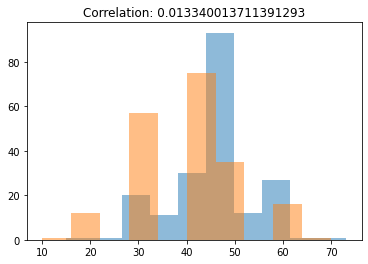

In [ ]:
predictions = []
for index, row in ms_data_comp[sig_sweet_CAS_005].iterrows():
    for cas in sig_sweet_CAS_005:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])
    

references = np.array(panelist_data_comp['Sweet'])
plt.hist(predictions, alpha = 0.5) #blue
plt.hist(references, alpha = 0.5)
plt.title("Correlation: "+ str(np.corrcoef(np.array(predictions), references)[0,1]))

In [ ]:
compare_df = pd.DataFrame(index=panelist_data_comp['Sweet'].index, columns = ["panelist","predictions"])
compare_df["panelist"] = panelist_data_comp["Sweet"]
compare_df["predictions"] = predictions
compare_df

,panelist,predictions
samplekey,,
000656,30,46.920761
000657,30,45.000000
000658,40,60.000000
000838,50,60.000000
000839,50,44.536095
...,...,...
000925,30,30.000000
000926,40,33.698467
000927,50,33.583787


### 7 parameters

for each cas number we create an antecedent object, inlcuding the cas number and values in the zscore range, meaning 25 numbers between -3 and 3. This will be than splitted into 7 areas representing dismal to esxcellent depending on the value which is illustrated in figure 4. The same was done for our Consequent, our output, which is the osa e.g. sweet which is a value between 0 and 100. This again in spliite into those 7 defined areas. 
After that we create the rules saying that one cas intensity has a specific value it will contribute in the overal score for our flavor. E.g. if our input intensity for a specific cas is over 2 than it contributes to a high score of the flavor specific osa. after defining these rules for every cas number the fuzzy control system is set up. 

In [ ]:
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(7)
    
    cas_antecedents.append( cas_antecedent) 
    
#osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')

osa_sweet.automf(7)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


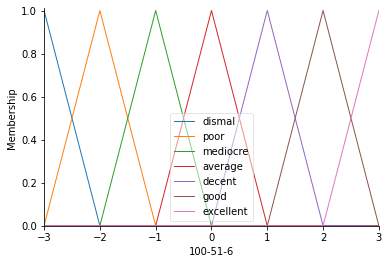

In [ ]:
cas_antecedents[0].view()

In [ ]:
rule_list = []
def rule_maker(cas_sweet):
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))



In [ ]:
for cas_antecedent in cas_antecedents:
    rule_maker(cas_antecedent)

In [ ]:
fuzzy_ctrl = ctrl.ControlSystem(rule_list)

In [ ]:
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [ ]:
ms_data['96-48-0']

sample_key
000920    0.0
000922    0.0
000927    0.0
000911    0.0
000925    0.0
         ... 
000596    0.0
000804    0.0
000853    0.0
000931    0.0
QC        0.0
Name: 96-48-0, Length: 239, dtype: float64

In [ ]:
sweet_test.loc['000839'].fillna(0)

100-51-6     -1.137804
101-97-3     -0.394205
10486-19-8   -0.816495
106-25-2     -0.202080
106-70-7     -0.196431
                ...   
94-59-7      -0.130586
95-93-2      -2.212036
96-48-0       0.000000
97-62-1      -0.803851
98-01-1       0.000000
Name: 000839, Length: 61, dtype: float64

panelist score for sweet:  50
prediction score for sweet:  41.00092345943133


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


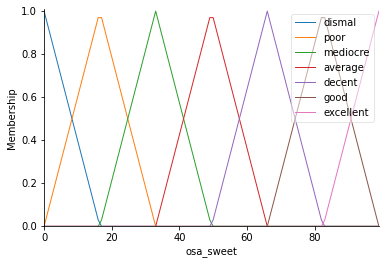

In [ ]:

for index, intensitiy in sweet_test.loc['000839'].fillna(0).items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  50
prediction score for sweet:  49.78072731494908


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


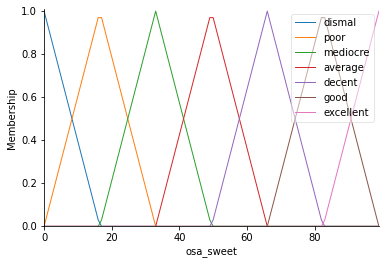

In [ ]:

for index, intensitiy in sweet_ms_df.loc['000839'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  60
prediction score for sweet:  56.27011732333022


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


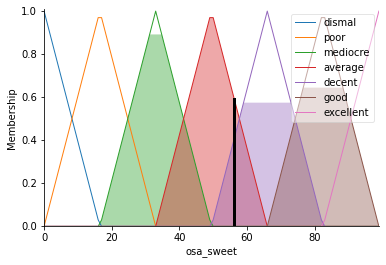

In [ ]:
for index, intensitiy in sweet_ms_df.loc['000425'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000425']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

In [ ]:
zscore_range=np.linspace(-1.5,1.5,732) # Since we only use zscored data, this range can be used everywhere 

cas_antecedents_2 = [] # we can just use an array, since the names are saved in the antecedent objects
# we only use the sweet descriptors 
for cas in sweet_descriptors_CAS:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(zscore_range, cas_name)
    cas_antecedent.automf(7)
    
    cas_antecedents_2.append( cas_antecedent) 
    
#osa_sweet = ctrl.Consequent(zscore_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 1), 'osa_sweet')

osa_sweet.automf(7)

rule_list_2 = []
def rule_maker(cas_sweet):
    rule_list_2.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list_2.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list_2.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list_2.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list_2.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list_2.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list_2.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))

for cas_antecedent in cas_antecedents_2:
    rule_maker(cas_antecedent)
fuzzy_ctrl_2 = ctrl.ControlSystem(rule_list_2)
fuzzy_1 = ctrl.ControlSystemSimulation(fuzzy_ctrl_2)

panelist score for sweet:  60
prediction score for sweet:  48.12334519333842


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


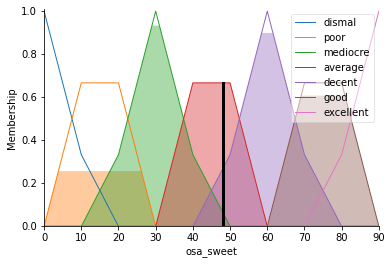

In [ ]:
for index, intensitiy in sweet_ms_df.loc['000425'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000425']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  50
prediction score for sweet:  46.812096695604495


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


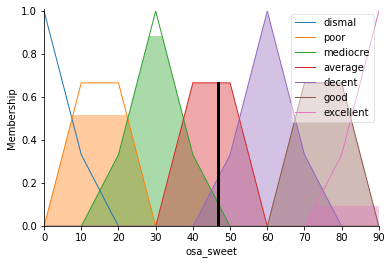

In [ ]:

for index, intensitiy in sweet_ms_df.loc['000839'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

panelist score for sweet:  50
prediction score for sweet:  93.48990825688072


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


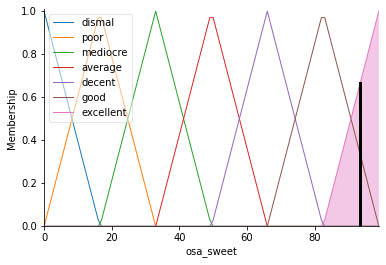

In [ ]:

for index, intensitiy in sweet_ms_df.loc['000839'].items():
    fuzzy.input[index] = 33
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = (panelist_data_comp).loc['000839']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

(array([ 2., 10., 15., 21.,  6.,  6.,  0.,  0.,  0.,  1.]),
 array([-0.89162031, -0.63800308, -0.38438585, -0.13076862,  0.1228486 ,
         0.37646583,  0.63008306,  0.88370028,  1.13731751,  1.39093474,
         1.64455196]),
 <BarContainer object of 10 artists>)

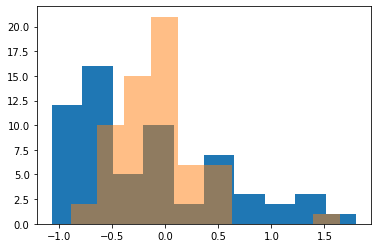

In [ ]:
plt.hist(sweet_ms_df.loc['000656'])
plt.hist(sweet_ms_df.loc['000425'], alpha=0.5)

panelist score for sweet:  30
prediction score for sweet:  56.4148894324869


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


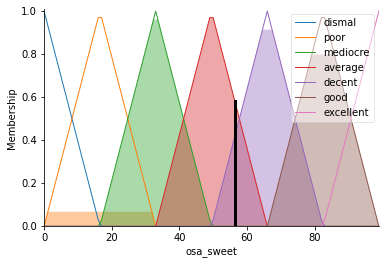

In [ ]:
for index, intensitiy in sweet_ms_df.loc['000656'].items():
    fuzzy.input[index] = intensitiy
    
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 
references = panelist_data_comp.loc['000656']['Sweet']

print("panelist score for sweet: " , references)
print("prediction score for sweet: ", prediction)

osa_sweet.view(sim=fuzzy)

(array([ 3.,  3.,  9., 10., 13., 17.,  2.,  0.,  0.,  4.]),
 array([-2.74635305, -2.47171775, -2.19708244, -1.92244714, -1.64781183,
        -1.37317653, -1.09854122, -0.82390592, -0.54927061, -0.27463531,
         0.        ]),
 <BarContainer object of 10 artists>)

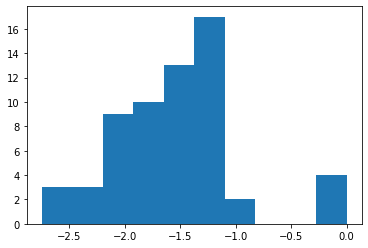

In [ ]:
plt.hist(sweet_ms_df.min())

(array([ 4.,  0.,  3.,  7.,  7., 14.,  8., 14.,  2.,  2.]),
 array([0.        , 0.66965148, 1.33930295, 2.00895443, 2.6786059 ,
        3.34825738, 4.01790885, 4.68756033, 5.35721181, 6.02686328,
        6.69651476]),
 <BarContainer object of 10 artists>)

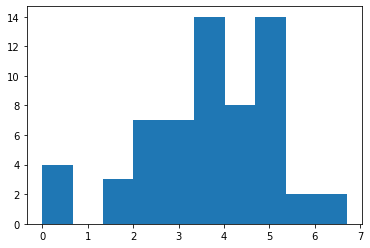

In [ ]:
plt.hist(sweet_ms_df.max())

In [ ]:
ms_data

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,13466-78-9,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.158771,0.895271,0.946861,0.819830,1.523904,1.523904,1.089262,1.158771,1.158771,0.895271,...,1.192345,1.523904,0.946861,1.289678,1.289678,1.012158,1.523904,1.523904,1.192345,1.124045
000922,0.916172,0.736523,0.973346,1.057127,1.579881,1.579881,1.165686,0.916172,0.916172,0.736523,...,0.877381,1.579881,0.973346,1.240674,1.240674,1.379843,1.579881,1.579881,0.877381,1.130342
000927,0.931354,0.735943,1.273055,1.348861,1.487501,1.487501,1.231637,0.931354,0.931354,0.735943,...,1.002939,1.487501,1.273055,1.204434,1.204434,1.180231,1.487501,1.487501,1.002939,0.995580
000911,0.867721,0.596470,1.236200,1.334076,1.742538,1.742538,1.312335,0.867721,0.867721,0.596470,...,1.114597,1.742538,1.236200,1.109609,1.109609,1.646824,1.742538,1.742538,1.114597,1.160102
000925,0.934255,0.796164,1.017651,1.176241,1.594876,1.594876,1.131459,0.934255,0.934255,0.796164,...,0.888183,1.594876,1.017651,1.296092,1.296092,1.294251,1.594876,1.594876,0.888183,1.070498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,1.033366,1.250555,0.628452,0.596864,0.879084,0.879084,0.883064,1.033366,1.033366,1.250555,...,0.877712,0.879084,0.628452,1.097687,1.097687,0.666417,0.879084,0.879084,0.877712,0.951425
000804,0.937218,1.116034,0.783412,1.058816,1.091539,1.091539,0.921019,0.937218,0.937218,1.116034,...,0.710260,1.091539,0.783412,0.728418,0.728418,0.816580,1.091539,1.091539,0.710260,1.049668
000853,1.511364,0.907463,1.119766,0.986312,1.233151,1.233151,0.769989,1.511364,1.511364,0.907463,...,1.213674,1.233151,1.119766,0.421277,0.421277,0.716920,1.233151,1.233151,1.213674,1.099703


(array([414., 246.,  65.,   5.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  2.32970324,  4.65940647,  6.98910971,  9.31881295,
        11.64851618, 13.97821942, 16.30792266, 18.63762589, 20.96732913,
        23.29703237]),
 <BarContainer object of 10 artists>)

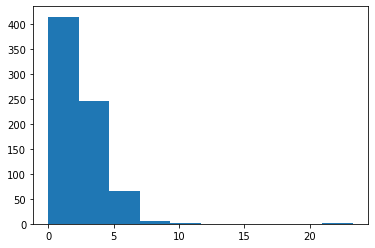

In [ ]:
plt.hist(ms_data.max())

In [ ]:
sweet_ms_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,78-36-4,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,0.145072,-0.402118,-0.158332,-0.282855,-1.021965,-0.454564,1.347565,-0.434720,-0.542226,0.342638,...,-0.376592,1.918544,-0.102087,0.335320,-0.402118,0.183367,1.756254,0.0,-0.196933,0.0
000922,-0.006007,0.054447,0.789525,-0.835267,0.352176,-0.793731,1.183626,-0.541566,0.487139,-0.638824,...,-0.433068,0.755909,0.881869,-0.524925,0.054447,0.704514,1.012943,0.0,0.064097,0.0
000927,-0.550657,1.086486,0.274945,-0.837286,-0.582593,-0.530549,1.062388,0.215911,0.665305,-0.577403,...,-0.415219,0.558190,-0.128824,-0.181994,1.086486,0.838267,1.056028,0.0,-0.439821,0.0
000911,-0.160641,0.036586,1.477778,-1.322621,0.310314,-0.105064,0.745156,0.389568,1.075946,-0.834838,...,0.334839,0.422073,0.336051,0.122970,0.036586,0.863101,2.377540,0.0,1.214402,0.0
000925,-0.582492,0.354348,0.568877,-0.627727,0.296694,-0.567692,1.369022,-0.143846,0.072743,-0.565667,...,-0.563842,0.925502,0.588295,-0.495422,0.354348,0.728937,1.164226,0.0,-0.210043,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,-0.376903,-0.657316,-1.049621,0.953460,-1.136752,-0.290011,0.705273,-1.196877,-1.219282,-0.164701,...,-1.057526,0.342758,1.865231,-0.524021,-0.657316,-0.401865,0.822045,0.0,-0.675180,0.0
000804,-0.649973,-0.445393,-0.662514,0.485352,1.491073,-0.341741,-0.530095,0.049392,0.015918,-0.553682,...,-0.051101,-0.524397,-0.033080,-0.981373,-0.445393,-0.009716,-0.759068,0.0,-0.090074,0.0
000853,0.212933,0.813260,-0.919430,-0.240430,1.320896,0.632151,-1.557615,0.242754,-0.361760,1.769095,...,0.460432,-1.123340,-0.714183,0.393576,0.813260,-0.105301,-1.600206,0.0,0.660416,0.0


In [ ]:
predictions = []
for index, row in sweet_ms_df.iterrows():
    for cas in sweet_descriptors_CAS:
        fuzzy.input[ cas ] = row[cas]
    
    fuzzy.compute()  
    predictions.append(fuzzy.output['osa_sweet'])

references = np.array(panelist_data_comp['Sweet'])



(array([ 1.,  9., 21., 37., 30., 56., 41., 30., 11.,  3.]),
 array([41.97711042, 43.84686235, 45.71661428, 47.58636621, 49.45611814,
        51.32587007, 53.195622  , 55.06537393, 56.93512586, 58.80487779,
        60.67462972]),
 <BarContainer object of 10 artists>)

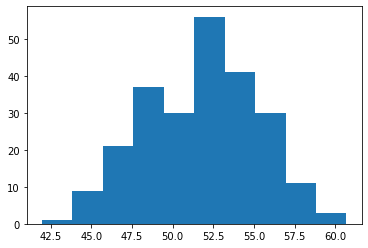

In [ ]:
plt.hist(predictions)    
# all predicitions are between 40 and 60 ? 

In [ ]:
references = np.array(panelist_data_comp['Sweet'])


(array([ 1.,  0.,  0.,  0., 12.,  0.,  0.,  0., 57.,  0.,  0.,  0., 75.,
         0.,  0.,  0., 35.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  1.]),
 array([10. , 12.4, 14.8, 17.2, 19.6, 22. , 24.4, 26.8, 29.2, 31.6, 34. ,
        36.4, 38.8, 41.2, 43.6, 46. , 48.4, 50.8, 53.2, 55.6, 58. , 60.4,
        62.8, 65.2, 67.6, 70. ]),
 <BarContainer object of 25 artists>)

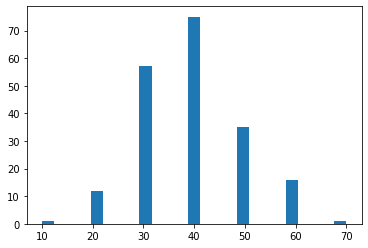

In [ ]:
plt.hist(references,25)

In [ ]:
len(predictions)

239

In [ ]:
len(references)

197

ValueError: x and y must have same first dimension, but have shapes (239,) and (197,)

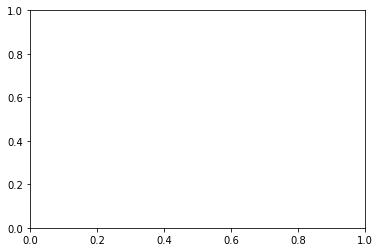

In [ ]:
plt.plot(predictions, references,'o')
plt.title("Correlation: "+ str(np.corrcoef(predictions, references)[0,1]))


### Try and Error:

### Basic example

In [ ]:
cas_range=np.linspace(-3,3,197)
#cas_range = np.array(ms_data_comp['6485-40-1'])
             
cas_001 = ctrl.Antecedent(cas_range, 'cas_001')
cas_002 = ctrl.Antecedent(cas_range, 'cas_002')
cas_003 = ctrl.Antecedent(cas_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(3)
cas_002.automf(3)
cas_003.automf(3)

osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
# tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
# tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
# tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

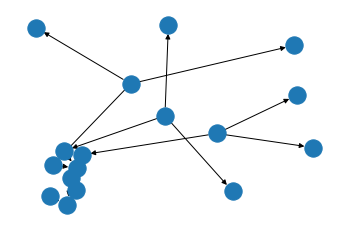

In [ ]:
rule_sweet_01 = (ctrl.Rule(cas_001['good'] | cas_002['good'] |cas_003['good'], osa_sweet['good']))
rule_sweet_02 = (ctrl.Rule(cas_001['average']|  cas_002['average'] | cas_003['average'], osa_sweet['average']))
rule_sweet_03 = (ctrl.Rule(cas_001['poor']| cas_002['poor'] |cas_003['poor'], osa_sweet['poor']))

rule_sweet_01.view()

cas_001 : 3
cas_002 : 3
cas_003 : 3

74.6341463414634


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


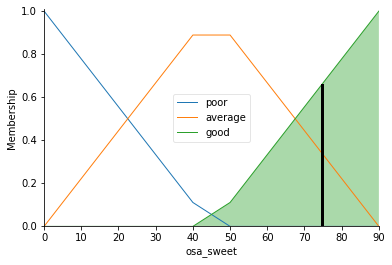

In [ ]:
tipping_ctrl = ctrl.ControlSystem([
    rule_sweet_01,
    rule_sweet_02,
    rule_sweet_03
])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


tipping.input['cas_001'] = 3
tipping.input['cas_002'] = 3
tipping.input['cas_003'] = 3

print(tipping.input)
# Crunch the numbers
tipping.compute()

prediction = tipping.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=tipping)

cas_001 : -3
cas_002 : -3
cas_003 : -3

5.999999999999999


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


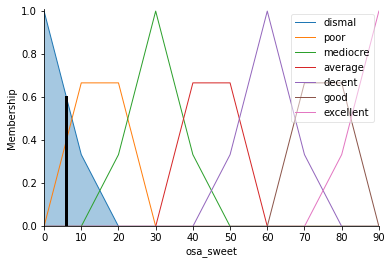

In [ ]:
# basic example 

cas_range=np.linspace(-3,3,197)
zscore_range=np.linspace(-3,3,25) # Since we only use zscored data, this range can be used everywhere 
#cas_range = np.array(ms_data_comp['6485-40-1'])
             
cas_001 = ctrl.Antecedent(zscore_range, 'cas_001')
cas_002 = ctrl.Antecedent(zscore_range, 'cas_002')
cas_003 = ctrl.Antecedent(zscore_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(7)
cas_002.automf(7)
cas_003.automf(7)

#osa_sweet = ctrl.Consequent(cas_range, 'osa_sweet')
osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(7)


rule_list = []
def rule_maker(cas_sweet):
    rule_list.append(ctrl.Rule(cas_sweet['good'], osa_sweet['good']))
    rule_list.append(ctrl.Rule(cas_sweet['excellent'], osa_sweet['excellent']))
    rule_list.append(ctrl.Rule(cas_sweet['decent'], osa_sweet['decent']))
    rule_list.append(ctrl.Rule(cas_sweet['mediocre'], osa_sweet['mediocre']))
    rule_list.append(ctrl.Rule(cas_sweet['average'], osa_sweet['average']))
    rule_list.append(ctrl.Rule(cas_sweet['poor'], osa_sweet['poor']))
    rule_list.append(ctrl.Rule(cas_sweet['dismal'], osa_sweet['dismal']))

rule_maker(cas_001)
rule_maker(cas_002)
rule_maker(cas_003)

fuzzy_ctrl = ctrl.ControlSystem(rule_list)
fuzzy = ctrl.ControlSystemSimulation(fuzzy_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


fuzzy.input['cas_001'] = -3
fuzzy.input['cas_002'] = -3
fuzzy.input['cas_003'] = -3
print(fuzzy.input)
# Crunch the numbers
fuzzy.compute()

prediction = fuzzy.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=fuzzy)